# Assignment 5 - 60 points possible

## Apple, Bird, Cookie:
## Data from Google's Quick, Draw!  Game

We will perform 2 tasks in this homework.  The first is to build a classifier that can tell whether a drawing is of an apple, a bird, or a cookie.  The data is taken from a game you can play online, developed by Google, called Quick, Draw!  The drawings are all Pictionary-style quick sketches of things.  Google has already done the work of turning the drawings into grayscale 28 x 28 images that are good for machine learning.  Since the images don't have that many pixels, the drawings are simplified, and there is a lot of data, this is an example of a relatively easy task for machine learning generally and neural networks in particular.  (There are many similar datasets here:  https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?pli=1&prefix=&forceOnObjectsSortingFiltering=false)

Before you do anything else in this assignment, it's *strongly recommended* that you do two things with your Google Colab setup.  First, go to the upper right and select "Connect to a hosted runtime."  Second, go to the menu at the top and select Runtime->Change runtime type->Pick GPU.  Selecting "GPU" will dramatically speed up the training times for the neural networks in this assignment.  But, picking GPU also resets the runtime, which is why you should do this before anything else.

Download the two zip files associated with this homework at https://drive.google.com/file/d/14ZkNqKC34mUW5yUa6WjYWf1R-CempaoB/view?usp=sharing and https://drive.google.com/file/d/14UmGyFC_WSywNcm2yrCfe0x04IuA42O8/view?usp=sharing and place them in your own Google Drive.  Then run the code boxes below (possibly modifying the path) to mount the drive and unzip the files.

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
# You may need to change "NNAssign" to your own directory name
!unzip gdrive/MyDrive/apple_bird_cookie.zip

Archive:  gdrive/MyDrive/apple_bird_cookie.zip
  inflating: full_numpy_bitmap_apple.npy  
  inflating: __MACOSX/._full_numpy_bitmap_apple.npy  
  inflating: full_numpy_bitmap_bird.npy  
  inflating: __MACOSX/._full_numpy_bitmap_bird.npy  
  inflating: full_numpy_bitmap_cookie.npy  
  inflating: __MACOSX/._full_numpy_bitmap_cookie.npy  


In [12]:
import numpy as np

apples = np.load('full_numpy_bitmap_apple.npy')
birds = np.load('full_numpy_bitmap_bird.npy')
cookies = np.load('full_numpy_bitmap_cookie.npy')

(1, 2pts) Call np.concatenate to join the three datasets together into a single array called "all_kinds".  Notice that the three datasets should be passed to np.concatenate as a tuple.


In [13]:
# TODO concatenate the data
all_kinds = np.concatenate((apples, birds, cookies))

(2, 3 pts) Now we need a list of labels that is as long as all_kinds.  Create a list named "labels" that is as long as all_kinds, where each element identifies which kind of drawing can be found at that place in all_kinds.  Label apples as 0, birds as 1, and cookies as 2.  (You may find it useful to call len() on the apples, birds, and cookies arrays.)

In [14]:
# TODO make labels
labels = [0]*len(apples) + [1]*len(birds) + [2]*len(cookies)

Now we'll call train_test_split to separate the data into training and testing data.

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_kinds, labels)

(3, 2pts) This data ranges from 0 to 255, but neural networks tend to work best when the data is between 0 and 1.
Scale the train and test data by dividing it by 255.

In [16]:
# TODO scale the data
x_test = x_test/255
x_train = x_train/255

(4, 5pts) If we examine the shape of x, it isn't quite what we want yet - it is an array of arrays that are of size length-of-data x 784.  784 is 28x28, and we want our convolutional neural networks to perceive the data as a 28x28 square instead of one long array of 784 elements.  Call x_train.reshape() and x_test.reshape() so that their dimensions are length-of-data x 28 x 28.  (Note that reshape expects a tuple that is the size as its argument.  You can pass -1 as one of the dimensions if you don't want to figure out how long the array is.)

In [17]:
x_train[0].shape

(784,)

In [18]:
# TODO reshape x_train
x_train = x_train.reshape((-1,28,28))

In [19]:
# TODO reshape x_test
x_test = x_test.reshape((-1,28,28))

If your reshape worked correctly, the following code should show a apple, bird, or cookie sketch.  If it didn't work, it will look like random noise.  If you're not sure, you can always try more images.

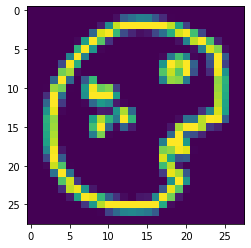

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # Should be a recognizable image if we reshaped correctly

As the last step before creating the neural network, we need to turn the labels into one-hot encodings, like [0,0,1] instead of 2.  There's a handy keras function that does this, and we're just going to call it for you.

In [22]:
from tensorflow import keras
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(5, 9pts) Rather than create a network completely from scratch, it makes sense to start with a network that you know does something similar.  One of the keras tutorials shows how to do digit recognition with a relatively small deep neural network.  The dataset, the MNIST digit dataset, is very similar to ours because it consists of 28 x 28 black and white line drawings.  Consult the "Build a Model" and "Train the model" sections of https://keras.io/examples/vision/mnist_convnet/ and get that neural network running on our apple, bird, and cookie data.  (Be sure to leave a comment indicating that you borrowed the structure from there.)


In [23]:
# TODO borrow the MNIST model with attribution
from tensorflow.keras import layers
import keras

input_shape = (28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [24]:
# TODO compile and fit the model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
2161/2161 [==============================] - 13s 5ms/step - loss: 0.1321 - accuracy: 0.9588 - val_loss: 0.0825 - val_accuracy: 0.9742
Epoch 2/15
2161/2161 [==============================] - 12s 6ms/step - loss: 0.0856 - accuracy: 0.9730 - val_loss: 0.0714 - val_accuracy: 0.9760
Epoch 3/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0750 - accuracy: 0.9760 - val_loss: 0.0647 - val_accuracy: 0.9792
Epoch 4/15
2161/2161 [==============================] - 11s 5ms/step - loss: 0.0694 - accuracy: 0.9775 - val_loss: 0.0594 - val_accuracy: 0.9802
Epoch 5/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.0571 - val_accuracy: 0.9810
Epoch 6/15
2161/2161 [==============================] - 14s 6ms/step - loss: 0.0626 - accuracy: 0.9795 - val_loss: 0.0543 - val_accuracy: 0.9817
Epoch 7/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0599 - accuracy: 0.9803 - val_loss: 0.0531 - val_ac

(6, 2pts) Evaluate the model on the test set with the code below.  You should have a test accuracy well above 90%.

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04904060438275337
Test accuracy: 0.9836249947547913


## Cats and Dogs

It was relatively easy to get good performance on that task, because the size of each input is small and the features needed for success weren't too complicated.  We'll now try a classification task with real images.  This is a moderately well-known "cats and dogs" dataset.  Unzip the dogs-vs-cats dataset in the current directory.  You can examine the files to see pictures of cats and dogs with varying dimensions and varying poses.

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/dogs-vs-cats.zip

In [6]:
!ls

dogs-vs-cats  gdrive  __MACOSX	sample_data


In [7]:
import tensorflow as tf
image_size = (180, 180)
batch_size = 32
# Data from https://www.kaggle.com/competitions/dogs-vs-cats/
# Code from https://keras.io/examples/vision/image_classification_from_scratch/
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


(7, 9pts) We'll suppose that the closest starting point network we have on hand for this is the MNIST network again.  Adapt it to this dataset with the following changes:

* The input shape is 180 x 180 x 3.
* Put the rescaling of dividing values by 255 in the network itself with a layers.Rescaling() layer after the Input layer.  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
* The final "softmax" activation function is only appropriate for multiclass classification.  Change this to a more appropriate activation function for binary classification.
* Name the model model2 to work with the training code below.

In [ ]:
# TODO create model2
from tensorflow.keras import layers
import keras

input_shape = (180,180,3)
num_classes = 1
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

You can train the network using the following code.

In [ ]:
epochs = 15

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(train_ds, epochs=epochs, validation_data=val_ds) # Validation data instead of fraction

Epoch 1/15
625/625 [==============================] - 36s 56ms/step - loss: 0.6002 - accuracy: 0.6678 - val_loss: 0.5320 - val_accuracy: 0.7296
Epoch 2/15
625/625 [==============================] - 37s 59ms/step - loss: 0.5030 - accuracy: 0.7534 - val_loss: 0.4978 - val_accuracy: 0.7596
Epoch 3/15
625/625 [==============================] - 39s 63ms/step - loss: 0.4518 - accuracy: 0.7918 - val_loss: 0.4968 - val_accuracy: 0.7650
Epoch 4/15
625/625 [==============================] - 36s 58ms/step - loss: 0.4076 - accuracy: 0.8122 - val_loss: 0.4822 - val_accuracy: 0.7790
Epoch 5/15
625/625 [==============================] - 38s 60ms/step - loss: 0.3695 - accuracy: 0.8325 - val_loss: 0.4952 - val_accuracy: 0.7824
Epoch 6/15
625/625 [==============================] - 38s 60ms/step - loss: 0.3339 - accuracy: 0.8521 - val_loss: 0.4805 - val_accuracy: 0.7942
Epoch 7/15
625/625 [==============================] - 36s 57ms/step - loss: 0.3058 - accuracy: 0.8684 - val_loss: 0.5114 - val_accuracy:

(8, 6pts) At this point, we should try to improve the network with a bit of architecture search.  Probably, the features extracted for the MNIST and apple/bird/cookie datasets are simpler than what's necessary for photos.  This implies needing deeper layers.  One strategy used by some well-known networks is to add blocks each consisting of a Conv2D layer followed by MaxPooling2D layer, where each Conv2D layer has twice as many filters as the last one (so 32, 64, 128 ...).  You can see our current architecture already follows this pattern.  Try training networks with one, two, and three more of these blocks between the last MaxPooling2D layer and the Flatten() call.

In [ ]:
# TODO define model3 with one more block of Conv2D and pooling
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 39s 61ms/step - loss: 0.5924 - accuracy: 0.6726 - val_loss: 0.5412 - val_accuracy: 0.7318
Epoch 2/15
625/625 [==============================] - 42s 67ms/step - loss: 0.4705 - accuracy: 0.7781 - val_loss: 0.4461 - val_accuracy: 0.7970
Epoch 3/15
625/625 [==============================] - 42s 67ms/step - loss: 0.4157 - accuracy: 0.8084 - val_loss: 0.4081 - val_accuracy: 0.8216
Epoch 4/15
625/625 [==============================] - 40s 64ms/step - loss: 0.3687 - accuracy: 0.8355 - val_loss: 0.3974 - val_accuracy: 0.8212
Epoch 5/15
625/625 [==============================] - 38s 60ms/step - loss: 0.3277 - accuracy: 0.8585 - val_loss: 0.3615 - val_accuracy: 0.8462
Epoch 6/15
625/625 [==============================] - 36s 58ms/step - loss: 0.2891 - accuracy: 0.8763 - val_loss: 0.3697 - val_accuracy: 0.8434
Epoch 7/15
625/625 [==============================] - 37s 59ms/step - loss: 0.2560 - accuracy: 0.8931 - val_loss: 0.3805 - val_accuracy:

In [ ]:
# TODO define model4 with two more blocks of Conv2D and pooling
model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model4.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 39s 61ms/step - loss: 0.6257 - accuracy: 0.6334 - val_loss: 0.5219 - val_accuracy: 0.7358
Epoch 2/15
625/625 [==============================] - 37s 59ms/step - loss: 0.4955 - accuracy: 0.7577 - val_loss: 0.4560 - val_accuracy: 0.7954
Epoch 3/15
625/625 [==============================] - 38s 61ms/step - loss: 0.4093 - accuracy: 0.8130 - val_loss: 0.3553 - val_accuracy: 0.8460
Epoch 4/15
625/625 [==============================] - 39s 63ms/step - loss: 0.3437 - accuracy: 0.8499 - val_loss: 0.3300 - val_accuracy: 0.8566
Epoch 5/15
625/625 [==============================] - 36s 58ms/step - loss: 0.2878 - accuracy: 0.8784 - val_loss: 0.2959 - val_accuracy: 0.8736
Epoch 6/15
625/625 [==============================] - 38s 60ms/step - loss: 0.2456 - accuracy: 0.8968 - val_loss: 0.2561 - val_accuracy: 0.8896
Epoch 7/15
625/625 [==============================] - 43s 68ms/step - loss: 0.2061 - accuracy: 0.9147 - val_loss: 0.2426 - val_accuracy:

In [ ]:
# TODO model5 with three more blocks of Conv2D and pooling
model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model5.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 39s 61ms/step - loss: 0.6359 - accuracy: 0.6259 - val_loss: 0.5609 - val_accuracy: 0.7336
Epoch 2/15
625/625 [==============================] - 38s 61ms/step - loss: 0.4993 - accuracy: 0.7549 - val_loss: 0.4504 - val_accuracy: 0.7806
Epoch 3/15
625/625 [==============================] - 37s 59ms/step - loss: 0.4090 - accuracy: 0.8110 - val_loss: 0.3616 - val_accuracy: 0.8334
Epoch 4/15
625/625 [==============================] - 40s 63ms/step - loss: 0.3318 - accuracy: 0.8540 - val_loss: 0.3059 - val_accuracy: 0.8656
Epoch 5/15
625/625 [==============================] - 39s 61ms/step - loss: 0.2672 - accuracy: 0.8865 - val_loss: 0.2669 - val_accuracy: 0.8854
Epoch 6/15
625/625 [==============================] - 39s 62ms/step - loss: 0.2165 - accuracy: 0.9079 - val_loss: 0.2528 - val_accuracy: 0.8910
Epoch 7/15
625/625 [==============================] - 38s 61ms/step - loss: 0.1773 - accuracy: 0.9269 - val_loss: 0.2612 - val_accuracy:

(9, 6pts) Architecture search could continue all day, but let's take a different approach to improving the network further.  When the accuracy on the training data is higher than the validation accuracy, this is evidence of overfitting.  Two approaches to handling overfitting are:

* More dropout.  We have one big layer of dropout, but we could have one or more additional layers of Dropout(0.2).
* Data augmentation.  If the dataset is randomly rotated and flipped, this encourages features that are robust against these transformations, and it makes it harder to overfit the data.  We can work this into the pipeline itself with layers.RandomFlip("horizontal") and layers.RandomRotation(0.1).

Train a new network with these two ideas worked into your best architecture so far.  (Your best architecture is the one that you achieved the highest validation accuracy on.)  The dropout locations are up to you.  Use 20 epochs instead of 15, since these methods slow down the learning somewhat.

In [ ]:
# TODO model6 with data augmentation and some extra dropout
model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 20

model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model6.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
625/625 [==============================] - 55s 86ms/step - loss: 0.6457 - accuracy: 0.6187 - val_loss: 0.5671 - val_accuracy: 0.7080
Epoch 2/20
625/625 [==============================] - 52s 83ms/step - loss: 0.5583 - accuracy: 0.7170 - val_loss: 0.4781 - val_accuracy: 0.7730
Epoch 3/20
625/625 [==============================] - 54s 86ms/step - loss: 0.4939 - accuracy: 0.7648 - val_loss: 0.4424 - val_accuracy: 0.7974
Epoch 4/20
625/625 [==============================] - 53s 84ms/step - loss: 0.4531 - accuracy: 0.7893 - val_loss: 0.4035 - val_accuracy: 0.8104
Epoch 5/20
625/625 [==============================] - 53s 84ms/step - loss: 0.4199 - accuracy: 0.8052 - val_loss: 0.3694 - val_accuracy: 0.8368
Epoch 6/20
625/625 [==============================] - 53s 84ms/step - loss: 0.3910 - accuracy: 0.8260 - val_loss: 0.3440 - val_accuracy: 0.8496
Epoch 7/20
625/625 [==============================] - 54s 86ms/step - loss: 0.3620 - accuracy: 0.8391 - val_loss: 0.3350 - val_accuracy:

(10, 7pts) Rather than building a model from nearly scratch, a different approach ("transfer learning") is to take an existing model that did something similar, including its trained weights, and retrain only a few layers at the very end of the model, keeping the rest of the model "frozen."  This allows complex features learned from a lot of data to be used on smaller problems with less data, and it saves on training time as well.

Go to https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/ and use the define_model() function from the section "Explore Transfer Learning" as the model this time.  You should keep the "adam" optimizer we've been using all along.  You should only need to train to 7 epochs.

In [9]:
# TODO adapt define_model() from https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

def define_model():
  model7 = Sequential()
  model7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
  model7.add(MaxPooling2D((2, 2)))
  model7.add(Flatten())
  model7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model7.add(Dense(1, activation='sigmoid'))
	# compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model7.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
  return model7
    # TODO

model7 = define_model()
model7.fit(train_ds, epochs=7,validation_data=val_ds)

Epoch 1/7
625/625 [==============================] - 44s 56ms/step - loss: 166.2894 - accuracy: 0.6026 - val_loss: 18.4338 - val_accuracy: 0.6622
Epoch 2/7
625/625 [==============================] - 37s 59ms/step - loss: 10.1474 - accuracy: 0.7214 - val_loss: 7.8641 - val_accuracy: 0.6882
Epoch 3/7
625/625 [==============================] - 35s 55ms/step - loss: 2.6665 - accuracy: 0.8130 - val_loss: 5.6884 - val_accuracy: 0.6634
Epoch 4/7
625/625 [==============================] - 35s 55ms/step - loss: 1.1114 - accuracy: 0.8681 - val_loss: 5.2528 - val_accuracy: 0.6662
Epoch 5/7
625/625 [==============================] - 38s 61ms/step - loss: 0.9034 - accuracy: 0.8874 - val_loss: 5.6952 - val_accuracy: 0.6568
Epoch 6/7
625/625 [==============================] - 35s 55ms/step - loss: 0.6863 - accuracy: 0.9023 - val_loss: 5.5766 - val_accuracy: 0.6546
Epoch 7/7
625/625 [==============================] - 35s 56ms/step - loss: 0.6589 - accuracy: 0.9090 - val_loss: 5.5529 - val_accuracy: 0.

(11, 9pts) Last, answer these questions.

(a, 3pts) Increasing the complexity of the network, by adding more layers for example, increases the chance that the network will overfit.  Why?

**This is because when a network becomes more complex it captures noise in the training data instead of the underlying signal. This means that the network does not generalize well which leads to overfitting.**

(b, 3pts) In your own words, how does dropout reduce overfitting?

**Dropout means that neurons cannot rely on one input since it could be dropped out at random, this reduces bias be reducing how much they can rely on one input. Which reduces overfitting since bias is a major cause of overfitting.**

(c, 3pts) Transfer learning is effective, and it's more effective the more similar the original task was to the present one.  Skim the Wikipedia page on ImageNet, the dataset used to train VGG-16 (and maybe follow up by searching this subset of ImageNet's classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Is there reason to think transfer learning with VGG-16 might be particularly effective for classifying cats and dogs?

**Yes, since VCG-16 is particularly easy to use with transfer learning it would be effective at classifying cats and dogs. Also, since they are both image classification and detection algorithms.**

**When you're done, use "File->Download .ipynb" and upload your .ipynb file to Blackboard, along with a PDF version (File->Print->Save as PDF) of your assignment.**